The MNIST data set is available [here](https://www.kaggle.com/c/digit-recognizer/).

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
%matplotlib inline

In [2]:
def get_mnist_matrices(df, nrows=28, ncols=28, has_label=True):
    matrices = []
    start = int(has_label)
    for idx, row in df.iterrows():
        matrices.append(row[start:].values.reshape(nrows, ncols))

    return matrices

In [3]:
def plot_matrices(matrices, max_cols, figsize=(9,9)):
    nmatrices = len(matrices)

    nrows = math.ceil(nmatrices / max_cols)
    ncols = min([nmatrices, max_cols])

    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols)

    if nrows == 1:
        ax = ax[np.newaxis,:]

    for n, mat in enumerate(matrices):
        ax[n // ncols, n % ncols].imshow(mat, cmap='gray')

    for n in range(1, nrows*ncols - nmatrices + 1):
        i = - (n // ncols + 1)
        j = - (n % ncols)
        ax[i,j].set_visible(False)

    plt.show()

In [4]:
train = pd.read_csv('train.csv.zip', compression='zip')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
label = 7
nrows, ncols = 28, 28
max_cols = 3
ncomponents = 5

In [7]:
matrices = get_mnist_matrices(train[train.label == label])

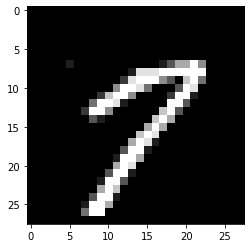

In [8]:
plt.imshow(matrices[232], cmap='gray')

plt.show()

In [9]:
X = train[train.label == label].drop(columns='label')

## Principal Component Analysis (PCA)

More info [here](https://en.wikipedia.org/wiki/Principal_component_analysis) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [10]:
pca = PCA(n_components=ncomponents)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
mats_pca = get_mnist_matrices(pd.DataFrame(pca.components_), has_label=False)

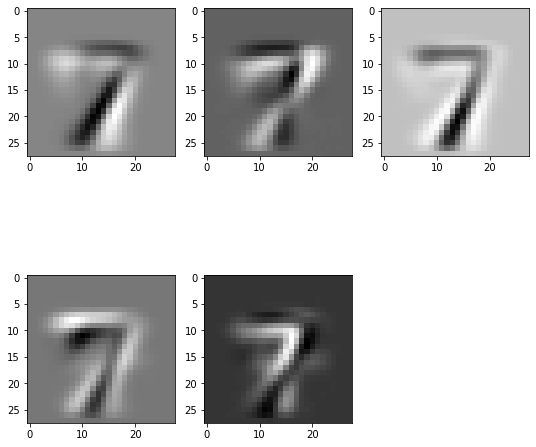

In [13]:
plot_matrices(mats_pca, max_cols=max_cols)

## Non-negative Matrix Factorization (NMF)

More info [here](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html).

In [14]:
nmf = NMF(n_components=ncomponents)

In [15]:
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [16]:
mats_nmf = get_mnist_matrices(pd.DataFrame(nmf.components_), has_label=False)

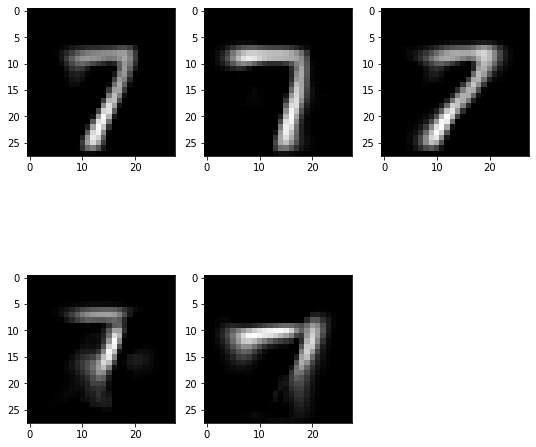

In [17]:
plot_matrices(mats_nmf, max_cols=max_cols)